In [1]:
import pandas as pd
import os

project_dir = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
input_dir = os.path.join(project_dir, "input")
dataset_path = os.path.join(input_dir, "WineQT.csv")
df = pd.read_csv(dataset_path)

In [2]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
# We can treat this problem either as a classification problem or as a regression
# problem since wine quality is nothing but a real number between 0 and 10. For
# simplicity, let’s choose classification.

# This dataset, however, consists of only six
# types of quality values (3 to 8). We will thus map all quality values from 0 to 5. 

In [6]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

# you can use the map function of pandas with
# any dictionary to convert the values in a given
# column to values in the dictionary
df.loc[:, "quality"] = df.quality.map(quality_mapping)


In [7]:
# SPLITTIN THE DATA INTO TRAINING AND TEST SETS

# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)

FULL_ROWS = df.shape[0]

TRAIN_ROWS = int(0.7 * FULL_ROWS)
TEST_ROWS = FULL_ROWS - TRAIN_ROWS

print("FULL_ROWS: ", FULL_ROWS)
print("TRAIN_ROWS: ", TRAIN_ROWS)
print("TEST_ROWS: ", TEST_ROWS)

# top 800 rows are selected for training
df_train = df.head(TRAIN_ROWS)

# bottom 599 values are selected for testing/validation
df_test = df.tail(TEST_ROWS)


FULL_ROWS:  1143
TRAIN_ROWS:  800
TEST_ROWS:  343


In [8]:
# TRAINING THE MODEL USING DECISION TREE

# import from scikit-learn
from sklearn import tree
from sklearn import metrics

# initialize decision tree classifier class
# with a max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth=3)

# choose the columns you want to train on
# these are the features for the model
cols = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol'
]

X = df_train[cols]
y: pd.Series[int] = df_train.quality

clf.fit(X, y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
# generate predictions on the training set
train_predictions = clf.predict(X)
# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])
# calculate the accuracy of predictions on# training data set
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)

# calculate the accuracy of predictions on# test data set
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)


In [10]:
print("train_accuracy: ", train_accuracy)
print("test_accuracy: ", test_accuracy)

train_accuracy:  0.61375
test_accuracy:  0.5189504373177842


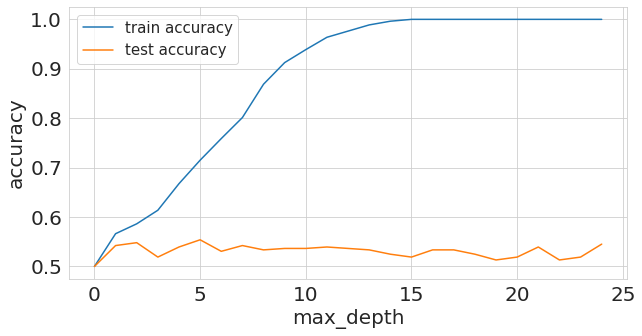

In [11]:
# Here, we have used accuracy, mainly because it
# is the most straightforward metric. It might not be the best metric for this problem.
# What about we calculate these accuracies for different values of max_depth and
# make a plot? 


# import scikit-learn tree and metrics
from sklearn import tree
from sklearn import metrics 
 
# import matplotlib and seaborn
# for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# this is our global size of label text
# on the plots
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

# This line ensures that the plot is displayed
# inside the notebook
%matplotlib inline 

# initialize lists to store accuracies
# for training and test data
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

# iterate over a few depth values
for depth in range(1, 25): 
    # init the model 
    clf = tree.DecisionTreeClassifier(max_depth=depth)

    # columns/features for training
    # note that, this can be done outside 
    # the loop
    cols = [
        'fixed acidity', 
        'volatile acidity',
        'citric acid', 
        'residual sugar',
        'chlorides',
        'free sulfur dioxide', 
        'total sulfur dioxide',
        'density',
        'pH', 
        'sulphates',
        'alcohol'
    ]

    # fit the model on given features
    clf.fit(df_train[cols], df_train.quality)

    # create training & test predictions 
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])

    # calculate training & test accuracies
    train_accuracy = metrics.accuracy_score(
        df_train.quality, train_predictions
    )
    test_accuracy = metrics.accuracy_score(
        df_test.quality, test_predictions
    )

    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy) 


# create two plots using matplotlib
# and seaborn
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15}) 
plt.xticks(range(0, 26, 5)) 
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()


In [12]:
# We see that the best score for test data is obtained when max_depth has a value of
# 14. As we keep increasing the value of this parameter, test accuracy remains the
# same or gets worse, but the training accuracy keeps increasing. It means that our
# simple decision tree model keeps learning about the training data better and better
# with an increase in max_depth, but the performance on test data does not improve
# at all. 

# Solution is to use cross-validation. splitting the training data into folds
## Types of cross validation:
### 1. Kfold: Use when target set classes are balanced
### 2. Stratified Kfold: Use when target set classes are skewed or regression problem
### 3. Holdout based validation: Used mostly for timeseries data
### 4. Group KFold based validation: pg 29

Text(0, 0.5, 'count')

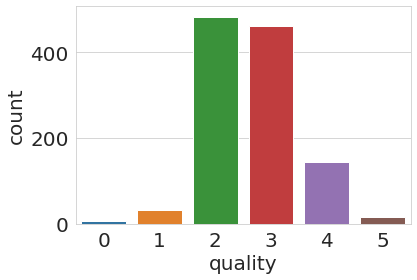

In [14]:
# Check the distribution of the target variable to see if it is evenly distributed or not.

b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)


# Hence use stratified Kfold on this dataset because the target classes are skewed